In [ ]:
from typing import TypedDict, Dict,List
import math
from langgraph.graph import StateGraph,START,END
import random

## Graph1

In [2]:
class AgentState(TypedDict):
    message:str

def greeting_node(state:AgentState)-> AgentState:
    """Simple node that adds greeting to the state."""
    state['message']="Hi "+state['message']+",Hope you are doing?"
    return state
def compliment_node(state:AgentState)-> AgentState:
    """Simple node that adds compliment to the state."""
    state['message']=state['message']+", you're doing an amazing job learning LangGraph!"
    return state

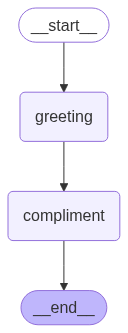

In [3]:
graph=StateGraph(AgentState)
graph.add_node("greeting",greeting_node)
graph.add_node("compliment",compliment_node)
graph.set_entry_point('greeting')
graph.add_edge('greeting','compliment')

graph.set_finish_point('compliment')
app=graph.compile()
app

In [4]:
app.invoke({'message':'Aoutik'})

{'message': "Hi Aoutik,Hope you are doing?, you're doing an amazing job learning LangGraph!"}

## Graph2


In [5]:
class AgentState(TypedDict):
    
    name:str
    values: List[int]
    operation:str
    result:str

def process(state:AgentState)->AgentState:
    """"Process node"""
    if state['operation']=="+":
        state['result']='Hi '+state['name']+", your answer is:"+ str(sum(state['values']))
    elif  state['operation']=="*":
        state['result']='Hi '+state['name']+", your answer is:"+ str(math.prod(state['values']))
    return state




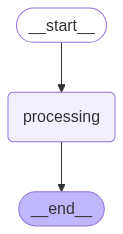

In [6]:
graph=StateGraph(AgentState)
graph.add_node("processing",process)
graph.set_entry_point('processing')

graph.set_finish_point('processing')
app=graph.compile()
app

In [7]:
app.invoke({'name':'Jack Sparrow','values':[1,2,3,4],'operation':'+'})['result']

'Hi Jack Sparrow, your answer is:10'

## Graph 4

In [41]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    number3:int
    operation2:str
    number4 : int
    finalnumber1: int
    finalnumber2 : int




def addition(state:AgentState)-> AgentState:
    """Addition of two numbers"""
    state['finalnumber1']=state['number1']+state['number2']
    
    return state
def addition2(state:AgentState)-> AgentState:
    """Addition of two numbers"""
    state['finalnumber2']=state['number3']+state['number4']
    
    return state

def subtract(state:AgentState)->AgentState:
    """Subtraction of two numbers"""
    state['finalnumber1']=state['number1']-state['number2']
    
    return state
def subtract2(state:AgentState)->AgentState:
    """Subtraction of two numbers"""
    state['finalnumber2']=state['number3']-state['number4']
    
    return state
    
def next_node(state:AgentState)-> AgentState:
    """This will select the next node of the graph"""
    if state['operation']=="+":
        return 'addition_operation'
    elif state['operation']=="-":
        return 'subtraction_operation'

def next_node2(state:AgentState)-> AgentState:
    """This will select the next node of the graph"""
    if state['operation2']=="+":
        return 'addition_operation2'
    elif state['operation2']=="-":
        return 'subtraction_operation2'


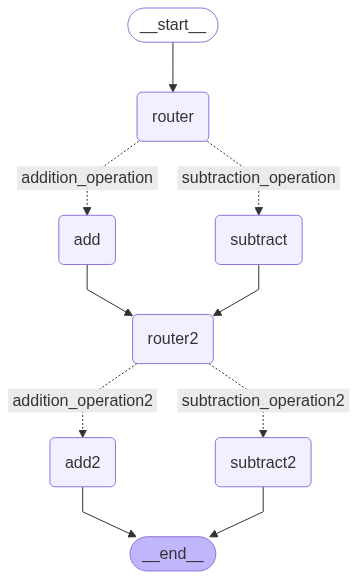

In [43]:
graph=StateGraph(AgentState)
graph.add_node('add',addition)
graph.add_node('subtract',subtract)
graph.add_node('add2',addition2)
graph.add_node('subtract2',subtract2)
graph.add_node('router',lambda state:state)
graph.add_node('router2',lambda state:state)

graph.add_edge(START,'router')

graph.add_conditional_edges('router',
                            next_node,
                            {'addition_operation':'add',
                             'subtraction_operation':'subtract'})

graph.add_edge('add','router2')
graph.add_edge('subtract','router2')

graph.add_conditional_edges('router2',
                            next_node2,
                            {'addition_operation2':'add2',
                             'subtraction_operation2':'subtract2'})

app=graph.compile()
app

In [48]:
app.invoke({'number1':43,'number2':12,'operation':'-','number3':23,'operation2':'+','number4':53})

{'number1': 43,
 'operation': '-',
 'number2': 12,
 'number3': 23,
 'operation2': '+',
 'number4': 53,
 'finalnumber1': 31,
 'finalnumber2': 76}

## Graph5

In [63]:
class AgentState(TypedDict):
    
    name:str
    number: List[int]
    counter: int

def greeting_node(state:AgentState)-> AgentState:
    """Simple node that adds greeting to the state."""
    state['name']="Hi "+state['name']+",Hope you are doing?"
    state['counter']=0
    return state

def random_number(state:AgentState)-> AgentState:
    """Generate random numbers"""
    
    state['number'].append(random.randint(0,10))
    state['counter']+=1
    return state

def loop_condition(state:AgentState)->AgentState:
    """check condition for loop"""
    if state['counter']<5:
        return 'loop'
    else:
        return 'exit'



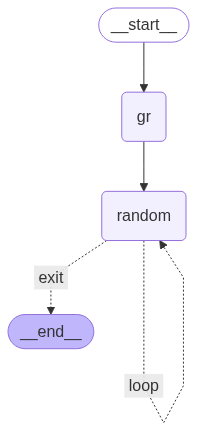

In [64]:
graph=StateGraph(AgentState)
graph.add_node('gr',greeting_node)
graph.add_node('random',random_number)
graph.add_edge('gr','random')

graph.add_conditional_edges('random',
                            loop_condition,
                            {'loop':'random',
                             'exit':END})
graph.add_edge(START,'gr')
app=graph.compile()
app

In [67]:
app.invoke({'name':'Aoutik','number':[],'counter':3})

{'name': 'Hi Aoutik,Hope you are doing?',
 'number': [10, 4, 8, 3, 4],
 'counter': 5}